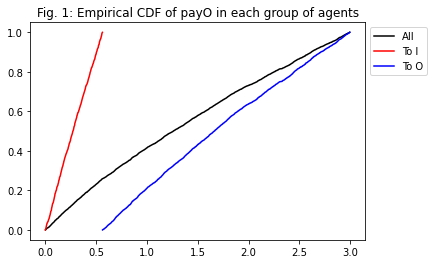

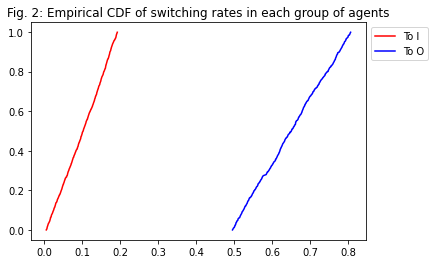

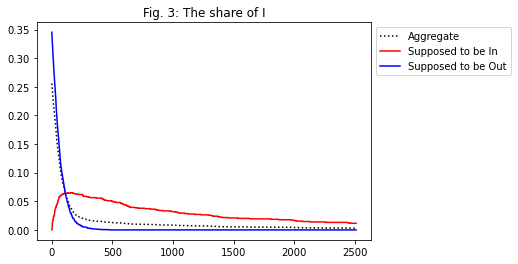

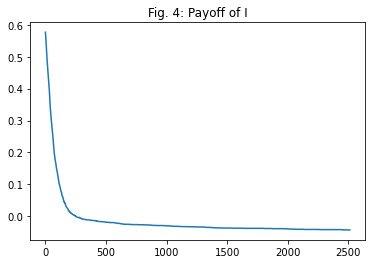

In [18]:
# Topic 8: Heterogeneity and aggregation in evolutionary dynamics

import math
import random
import matplotlib.pyplot as plt

""" Assignment"""
student_id = 1513
numDays = 1000 + student_id

"""Define the population game"""
# Coordination game 
strtgSet = [0,1]
def payI_fn(aggShareI):
    return (49 * aggShareI - 1)/20
# Aggregate agents' strategies to the aggregate share of I
def shareI_calc(agentsSubList):
    agentsStrtg = [agent.strtg for agent in agentsSubList]
    return agentsStrtg.count(1)/len(agentsStrtg)

"""Define an Agent class"""
class Agent():
    # Constructor
    def __init__(self, strtg, payO):
        self.strtg = strtg
        self.payO = payO
    # Revision of strategy given a switching rate function
    def strtgRev(self, payI):
        # calculate the gross gain (payoff improvement)
        payVec = [self.payO, payI]
        maxPay = max(payVec)
        gain = maxPay - payVec[self.strtg]
        # Decide whether to switch to the candidate strtg 
        if gain > 0: # switching is better
            if random.uniform(0,1) < self.switchRate(gain):
                # switch does happen
                maxStrtg = [i for i in strtgSet if payVec[i] == maxPay]
                self.strtg = random.choice(maxStrtg)
            # otherwise, keep the current strategy
    # Tempered BRD w/ a linear switching rate function
    def switchRate(self,gain):
        qmax = 3
        if gain < 0:
            return 0
        elif gain > qmax:
            return 1
        else: #0 =< gain <= qmax
            return gain/qmax

""" The initial State """
# Parameters
initNumAgents = 5000
initAggShareI = 0.25

# inverse of the CDF of a uniform distribution, p = P(s) = \sqrt(s+1)-1
def invCDF(p):
    return (p+1)**2 - 1

# assign action according to a reversed composition
def compRevComp(p, agentsSubList):
    payO = invCDF(p)
    if p < 1-initAggShareI:
        agent = Agent(0, payO)
        agentsSubList.append(agent)
    else:
        agent = Agent(1, payO)
        agentsSubList.append(agent)

# A completely reversed composition
agentsToI = []
agentsToO = []
for i in range(initNumAgents):
    p = random.uniform(0,1)
    if p < initAggShareI:
        compRevComp(p, agentsToI)
    else:
        compRevComp(p, agentsToO)
agentsAll = agentsToO + agentsToI 

""" Analyze the switching rate dist."""
def plotCDF(list, label=None, color='k'):
    x = sorted(list)
    y = [i/len(x) for i in range(len(x))]
    plt.plot(x, y, label=label, color=color)

# Empirical dist. of types
plotCDF([agent.payO for agent in agentsAll], 'All')
plotCDF([agent.payO for agent in agentsToI], 'To I', 'r')
plotCDF([agent.payO for agent in agentsToO], 'To O', 'b')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Fig. 1: Empirical CDF of payO in each group of agents')

# Initial Dist. of switching rates 
initPayI = payI_fn(shareI_calc(agentsAll))
initQ_OtoI = [agent.switchRate(initPayI - agent.payO) for agent in agentsToI if agent.strtg == 0]
initQ_ItoO = [agent.switchRate(agent.payO - initPayI) for agent in agentsToO if agent.strtg == 1]

plt.figure()
plotCDF(initQ_OtoI, 'To I', 'r')
plotCDF(initQ_ItoO, 'To O', 'b')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Fig. 2: Empirical CDF of switching rates in each group of agents')

""" Dynamics """
# Parameters
revRate = 0.02
aggShareIHist = []
payIHist = []
shareI_ToIHist = []
shareI_ToOHist = []
# Simulation
for day in range(numDays):
    aggShareICurrent = shareI_calc(agentsAll)
    payICurrent = payI_fn(aggShareICurrent)
    # Appended the current state to hist. lists 
    aggShareIHist.append(aggShareICurrent)
    payIHist.append(payICurrent)
    shareI_ToIHist.append(shareI_calc(agentsToI))
    shareI_ToOHist.append(shareI_calc(agentsToO))
    # An agent revises the strategy choice
    agentsToRev = random.sample(agentsAll, math.floor(initNumAgents*revRate))
    for agent in agentsToRev:
        agent.strtgRev(payICurrent)

""" Plot the results """
# share of I 
plt.figure()
plt.plot(aggShareIHist, label='Aggregate', color='black', linestyle=':')
plt.plot(shareI_ToIHist, label='Supposed to be In', color='r')
plt.plot(shareI_ToOHist, label='Supposed to be Out', color='b')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Fig. 3: The share of I')

# payoff
plt.figure()
plt.plot(payIHist)
plt.title('Fig. 4: Payoff of I')
plt.show()

i) In a aggregable representative agent (homogeneous BRD), the aggregate equilibrium should be stable at $\bar{x}$ = 0.25, that is the share of IN should be .25 in equilirbium. However, in a heterogenous case with disaggregability, the aggregate share of I deviates from such a case and converges towards zero. Observe the dashed black line in Figure 3.

ii) The reason for this divergence is due to disaggregability. There are 2 reasons: First, since the payoff of strategy I depends on its share in the population, if the initial share of I is not high enough (Theorem 4), escape from the stable aggregate equilibrium is more likely. Second, the tempered BR with switching rate makes agents less responsive to make changes when receiving a revision opportunity. 

We see from Fig 4 that, the initial payoff from I was high enough to attract some agents towards I. But the rate of decline in the share of I (to O) was so fast, that it drags the aggregate share of I together with it (Fig 3), which makes the payoff from I decreasing. Thus, when an agent receives a revision opportunity, those who were supposed to choose I switched to O instead to enjoy higher payoff. The tBR dynamics then required a higher payoff from I for the agents to make the switch, which got more and more difficult because payoff from I kept decreasing. The cycle continues and eventually, the aggregate share of I reached zero.